In [1]:
import pandas as pd
import numpy as np


In [2]:
pd.set_option('display.max_rows',  200)
pd.set_option('display.max_columns',  20)
pd.set_option('display.max_colwidth',  20)

In [3]:
data = pd.read_csv('dataset.csv')
data.head()

,id,Full Name,Date of Birth,email,gender,Job,Company,Country,Salary,Phone,Quote,Income,Income.1
0,1,Salim Pound,2/12/2018,spound0@spotify.com,Male,Editor,Gigashots,Israel,19QtDp5HkyuZZqww...,610-741-3882,Compatible discr...,46476.638080,$46476.6380809961
1,2,Madelene Lutas,9/20/2018,mlutas1@si.edu,Female,VP Marketing,Wikivu,Mongolia,17ADLE8HiTj7m1tT...,221-725-8860,Grass-roots real...,54174.687950,$54174.6879482406
2,3,Dolli Swanbourne,11/18/2018,dswanbourne2@ist...,Female,Associate Professor,Dabfeed,Vietnam,16ThVxH72YAXWiEB...,303-720-8280,Innovative syste...,5449.873348,$5449.87334818567
3,4,Graeme Croisier,9/29/2018,gcroisier3@paral...,Male,Mechanical Syste...,Trudoo,Bosnia and Herze...,1JLUVwmjHvxgh53C...,673-794-9917,Customer-focused...,46784.630880,$46784.6308786279
4,5,Jillana Physic,4/19/2018,jphysic4@yellowb...,Female,Account Executive,Buzzshare,China,1DaEUNoAWL68pnvT...,709-146-6263,Progressive dyna...,57486.495560,$57486.4955595568


In [4]:
data.shape

(1000, 13)

In [5]:
data.isnull().mean()*100

id               0.0
Full Name        0.0
Date of Birth    0.0
email            0.0
gender           0.0
Job              0.0
Company          0.0
Country          0.2
Salary           0.0
Phone            0.0
Quote            0.0
Income           0.5
Income.1         0.0
dtype: float64

In [6]:
data.isnull().sum()

id               0
Full Name        0
Date of Birth    0
email            0
gender           0
Job              0
Company          0
Country          2
Salary           0
Phone            0
Quote            0
Income           5
Income.1         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
id               1000 non-null int64
Full Name        1000 non-null object
Date of Birth    1000 non-null object
email            1000 non-null object
gender           1000 non-null object
Job              1000 non-null object
Company          1000 non-null object
Country          998 non-null object
Salary           1000 non-null object
Phone            1000 non-null object
Quote            1000 non-null object
Income           995 non-null float64
Income.1         1000 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 101.6+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.500000,288.819436,1.000000,250.750000,500.50000,750.250000,1000.00000
Income,995.0,31135.034708,16713.941257,2021.240883,16601.336715,32365.61174,44909.237955,59904.41603


In [10]:
# Data has missing values in columns ['Country', 'Income' ]
# column names are mix of upper and lower case
# Salary Income.1 column can be dropped


In [11]:
data.nunique()

id               1000
Full Name        1000
Date of Birth     344
email            1000
gender              2
Job               184
Company           353
Country           126
Salary           1000
Phone            1000
Quote             999
Income            983
Income.1          984
dtype: int64

### Changing Column Names

In [12]:
data.columns = data.columns.str.replace(' ', '_').str.title()
data.columns

Index(['Id', 'Full_Name', 'Date_Of_Birth', 'Email', 'Gender', 'Job', 'Company',
       'Country', 'Salary', 'Phone', 'Quote', 'Income', 'Income.1'],
      dtype='object')

### Dropping Salary Column

In [13]:
data.drop(['Salary', 'Income.1'], inplace = True, axis = 1)
data.shape

(1000, 11)

### Handling Missing Values

In [14]:
data[data['Country'].isnull() == True]

,Id,Full_Name,Date_Of_Birth,Email,Gender,Job,Company,Country,Phone,Quote,Income
11,12,Dame Povele,6/26/2018,dpoveleb@bloglov...,Male,Editor,Avamm,NaN,961-960-2015,Networked static...,8917.447432
29,30,Elliott Jeandillou,3/28/2018,ejeandillout@big...,Male,Software Test En...,Photobean,NaN,329-643-1523,Networked intang...,21378.765220


In [15]:
# Replacing Missing Country values with 'Unknown'
data['Country'].fillna('Unknown', inplace = True)

In [16]:
data[data['Income'].isnull() == True]

,Id,Full_Name,Date_Of_Birth,Email,Gender,Job,Company,Country,Phone,Quote,Income
5,6,Anetta Yokelman,4/26/2018,ayokelman5@berke...,Female,Food Chemist,Camimbo,Cape Verde,773-395-7487,Multi-tiered tan...,NaN
14,15,Alexandro Sember,4/8/2018,asembere@ibm.com,Male,Environmental Sp...,Wikizz,Russia,732-359-1122,Diverse zero adm...,NaN
172,173,Sheridan Sergeaunt,1/31/2018,ssergeaunt4s@geo...,Male,Nurse,Skynoodle,Indonesia,664-232-9582,Programmable val...,NaN
183,184,Terrye Few,3/21/2018,tfew53@shinystat...,Female,Environmental Tech,Kayveo,Japan,815-183-6581,Proactive human-...,NaN
982,983,Tomasine Dawnay,8/10/2018,tdawnayra@lycos.com,Female,Senior Editor,Edgewire,Brazil,466-963-6253,Fully-configurab...,NaN


In [17]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x10137a58>,
 'caps': [<matplotlib.lines.Line2D at 0x12900a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x12900048>],
 'medians': [<matplotlib.lines.Line2D at 0x12900eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x129114a8>],
 'means': []}

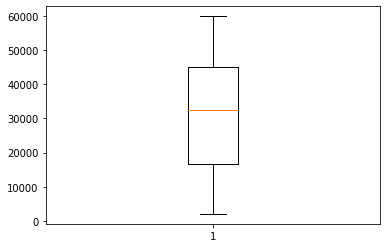

In [18]:
plt.boxplot(data['Income'].dropna().astype('int64'))

In [19]:
# Replacing Income with mean
data['Income'].fillna(data['Income'].mean(),  inplace = True)

In [20]:
data.loc[[5, 14, 172, 183, 982]]

,Id,Full_Name,Date_Of_Birth,Email,Gender,Job,Company,Country,Phone,Quote,Income
5,6,Anetta Yokelman,4/26/2018,ayokelman5@berke...,Female,Food Chemist,Camimbo,Cape Verde,773-395-7487,Multi-tiered tan...,31135.034708
14,15,Alexandro Sember,4/8/2018,asembere@ibm.com,Male,Environmental Sp...,Wikizz,Russia,732-359-1122,Diverse zero adm...,31135.034708
172,173,Sheridan Sergeaunt,1/31/2018,ssergeaunt4s@geo...,Male,Nurse,Skynoodle,Indonesia,664-232-9582,Programmable val...,31135.034708
183,184,Terrye Few,3/21/2018,tfew53@shinystat...,Female,Environmental Tech,Kayveo,Japan,815-183-6581,Proactive human-...,31135.034708
982,983,Tomasine Dawnay,8/10/2018,tdawnayra@lycos.com,Female,Senior Editor,Edgewire,Brazil,466-963-6253,Fully-configurab...,31135.034708


In [21]:
data['Income']  = data['Income'].round(2)

In [22]:
data.head()

,Id,Full_Name,Date_Of_Birth,Email,Gender,Job,Company,Country,Phone,Quote,Income
0,1,Salim Pound,2/12/2018,spound0@spotify.com,Male,Editor,Gigashots,Israel,610-741-3882,Compatible discr...,46476.64
1,2,Madelene Lutas,9/20/2018,mlutas1@si.edu,Female,VP Marketing,Wikivu,Mongolia,221-725-8860,Grass-roots real...,54174.69
2,3,Dolli Swanbourne,11/18/2018,dswanbourne2@ist...,Female,Associate Professor,Dabfeed,Vietnam,303-720-8280,Innovative syste...,5449.87
3,4,Graeme Croisier,9/29/2018,gcroisier3@paral...,Male,Mechanical Syste...,Trudoo,Bosnia and Herze...,673-794-9917,Customer-focused...,46784.63
4,5,Jillana Physic,4/19/2018,jphysic4@yellowb...,Female,Account Executive,Buzzshare,China,709-146-6263,Progressive dyna...,57486.50


In [23]:
data['Date_Of_Birth'] = data['Date_Of_Birth'].apply(pd.to_datetime)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Id               1000 non-null int64
Full_Name        1000 non-null object
Date_Of_Birth    1000 non-null datetime64[ns]
Email            1000 non-null object
Gender           1000 non-null object
Job              1000 non-null object
Company          1000 non-null object
Country          1000 non-null object
Phone            1000 non-null object
Quote            1000 non-null object
Income           1000 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 86.0+ KB


In [25]:
df1 = data.copy()

In [26]:
df2 = df1['Full_Name'].str.split(' ', expand = True)

In [27]:
df2.head()

,0,1,2,3
0,Salim,Pound,None,None
1,Madelene,Lutas,None,None
2,Dolli,Swanbourne,None,None
3,Graeme,Croisier,None,None
4,Jillana,Physic,None,None


In [28]:
df1 = df1.join(df1.Full_Name.str.split(" ",n=1,expand=True))

In [29]:
df1.head()

,Id,Full_Name,Date_Of_Birth,Email,Gender,Job,Company,Country,Phone,Quote,Income,0,1
0,1,Salim Pound,2018-02-12,spound0@spotify.com,Male,Editor,Gigashots,Israel,610-741-3882,Compatible discr...,46476.64,Salim,Pound
1,2,Madelene Lutas,2018-09-20,mlutas1@si.edu,Female,VP Marketing,Wikivu,Mongolia,221-725-8860,Grass-roots real...,54174.69,Madelene,Lutas
2,3,Dolli Swanbourne,2018-11-18,dswanbourne2@ist...,Female,Associate Professor,Dabfeed,Vietnam,303-720-8280,Innovative syste...,5449.87,Dolli,Swanbourne
3,4,Graeme Croisier,2018-09-29,gcroisier3@paral...,Male,Mechanical Syste...,Trudoo,Bosnia and Herze...,673-794-9917,Customer-focused...,46784.63,Graeme,Croisier
4,5,Jillana Physic,2018-04-19,jphysic4@yellowb...,Female,Account Executive,Buzzshare,China,709-146-6263,Progressive dyna...,57486.50,Jillana,Physic


In [30]:
df1.rename(columns = {0: 'First_Name', 1: 'Last_Name'}, inplace = True)
df1.columns

Index(['Id', 'Full_Name', 'Date_Of_Birth', 'Email', 'Gender', 'Job', 'Company',
       'Country', 'Phone', 'Quote', 'Income', 'First_Name', 'Last_Name'],
      dtype='object')

In [31]:
df1.head()

,Id,Full_Name,Date_Of_Birth,Email,Gender,Job,Company,Country,Phone,Quote,Income,First_Name,Last_Name
0,1,Salim Pound,2018-02-12,spound0@spotify.com,Male,Editor,Gigashots,Israel,610-741-3882,Compatible discr...,46476.64,Salim,Pound
1,2,Madelene Lutas,2018-09-20,mlutas1@si.edu,Female,VP Marketing,Wikivu,Mongolia,221-725-8860,Grass-roots real...,54174.69,Madelene,Lutas
2,3,Dolli Swanbourne,2018-11-18,dswanbourne2@ist...,Female,Associate Professor,Dabfeed,Vietnam,303-720-8280,Innovative syste...,5449.87,Dolli,Swanbourne
3,4,Graeme Croisier,2018-09-29,gcroisier3@paral...,Male,Mechanical Syste...,Trudoo,Bosnia and Herze...,673-794-9917,Customer-focused...,46784.63,Graeme,Croisier
4,5,Jillana Physic,2018-04-19,jphysic4@yellowb...,Female,Account Executive,Buzzshare,China,709-146-6263,Progressive dyna...,57486.50,Jillana,Physic


In [32]:
# Get the values email from @usnews.com
df1[df1.Email.str.contains('@usnews')]

,Id,Full_Name,Date_Of_Birth,Email,Gender,Job,Company,Country,Phone,Quote,Income,First_Name,Last_Name
81,82,Herschel Izac,2018-12-06,hizac29@usnews.com,Male,Data Coordiator,Avamm,Japan,665-422-7430,Enhanced methodi...,3180.64,Herschel,Izac
394,395,Ofelia Stubbings,2018-05-22,ostubbingsay@usn...,Female,Automation Speci...,Kwinu,Portugal,888-783-5976,Focused analyzin...,25280.01,Ofelia,Stubbings
478,479,Jemimah Castagnet,2018-07-21,jcastagnetda@usn...,Female,Administrative A...,Meevee,Russia,638-700-7483,Down-sized radic...,18543.11,Jemimah,Castagnet
820,821,Gaultiero Scrivinor,2018-04-27,gscrivinorms@usn...,Male,Programmer Analy...,Gabcube,Ukraine,326-187-3038,Streamlined web-...,7418.20,Gaultiero,Scrivinor
987,988,Casey MacTerrelly,2018-08-03,cmacterrellyrf@u...,Male,Cost Accountant,Yambee,Netherlands,951-108-9234,Optional multi-s...,54438.43,Casey,MacTerrelly


In [33]:
# Check For Multiple Expression
df1[df1.Email.str.contains('@usnews|@spotify', regex=True)]

,Id,Full_Name,Date_Of_Birth,Email,Gender,Job,Company,Country,Phone,Quote,Income,First_Name,Last_Name
0,1,Salim Pound,2018-02-12,spound0@spotify.com,Male,Editor,Gigashots,Israel,610-741-3882,Compatible discr...,46476.64,Salim,Pound
81,82,Herschel Izac,2018-12-06,hizac29@usnews.com,Male,Data Coordiator,Avamm,Japan,665-422-7430,Enhanced methodi...,3180.64,Herschel,Izac
351,352,Kaia Probart,2018-04-08,kprobart9r@spoti...,Female,Business Systems...,Jabberbean,China,318-884-5435,Virtual zero tol...,10046.75,Kaia,Probart
394,395,Ofelia Stubbings,2018-05-22,ostubbingsay@usn...,Female,Automation Speci...,Kwinu,Portugal,888-783-5976,Focused analyzin...,25280.01,Ofelia,Stubbings
456,457,Harri Nobbs,2018-08-11,hnobbsco@spotify...,Female,Physical Therapy...,Tekfly,China,445-341-5705,Profound increme...,5166.66,Harri,Nobbs
478,479,Jemimah Castagnet,2018-07-21,jcastagnetda@usn...,Female,Administrative A...,Meevee,Russia,638-700-7483,Down-sized radic...,18543.11,Jemimah,Castagnet
557,558,Susann Arnal,2018-10-15,sarnalfh@spotify...,Female,Research Nurse,Realbuzz,Philippines,164-602-2842,Business-focused...,59044.16,Susann,Arnal
820,821,Gaultiero Scrivinor,2018-04-27,gscrivinorms@usn...,Male,Programmer Analy...,Gabcube,Ukraine,326-187-3038,Streamlined web-...,7418.20,Gaultiero,Scrivinor
912,913,Shea Keeble,2018-03-19,skeeblepc@spotif...,Female,Professor,Blogpad,Sweden,143-238-2533,Networked second...,8505.02,Shea,Keeble
981,982,Rafa Lyfe,2017-12-22,rlyfer9@spotify.com,Female,Electrical Engineer,Thoughtsphere,Honduras,692-243-5743,Configurable res...,23416.12,Rafa,Lyfe


In [34]:
# df1.to_csv('My_file_1')